### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

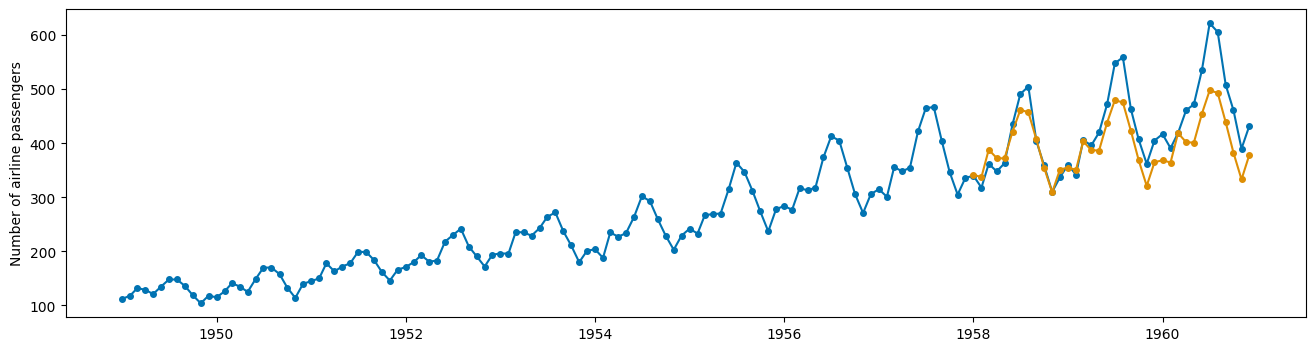

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series

y = load_airline()

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(y, test_size=36)

# Define the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Initialize and fit the Theta forecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

# Generate predictions
y_pred = forecaster.predict(fh)

# Calculate and return the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
plot_series(y, y_pred)

In [2]:
import sys
import os

training_dir = os.path.join(os.path.dirname("training/"), '')
sys.path.append(training_dir)
print(training_dir)

training/


0.14055602488835772


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Level'>)

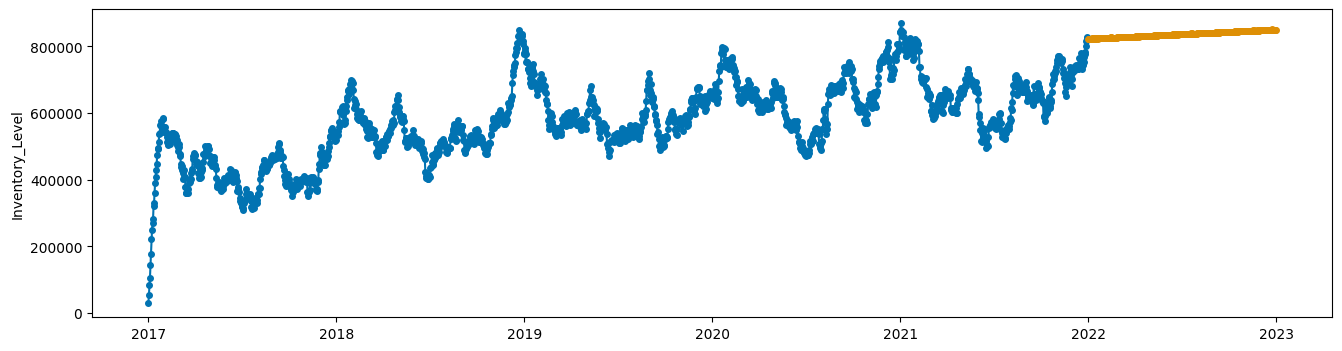

In [3]:


data = pd.read_csv("train_inventory(in).csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index = pd.DatetimeIndex(data.index).to_period('D')
ts = data['Inventory_Level']

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(ts, test_size=365)

# Define the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Initialize and fit the Theta forecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

# Generate predictions
y_pred = forecaster.predict(fh)

# Calculate and return the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

plot_series(y_train, y_pred)

In [4]:
data = pd.read_csv("train_inventory(in).csv", parse_dates=["Date"])
print(data)
monthly_sum = data.groupby(data["Date"].dt.to_period("M"))["Inventory_Level"].sum()
monthly_sum = monthly_sum.to_timestamp()
print(monthly_sum)

           Date  Inventory_Level
0    2017-01-01            29154
1    2017-01-02            55036
2    2017-01-03            83609
3    2017-01-04           105607
4    2017-01-05           143171
...         ...              ...
2186 2022-12-27           970543
2187 2022-12-28           947143
2188 2022-12-29           925720
2189 2022-12-30           929153
2190 2022-12-31           940582

[2191 rows x 2 columns]
Date
2017-01-01    11868504
2017-02-01    14722387
2017-03-01    13107102
2017-04-01    13727546
2017-05-01    12750132
                ...   
2022-08-01    23759888
2022-09-01    22916972
2022-10-01    22137101
2022-11-01    23351432
2022-12-01    28076257
Freq: MS, Name: Inventory_Level, Length: 72, dtype: int64


0        29154
1        55036
2        83609
3       105607
4       143171
         ...  
2186    970543
2187    947143
2188    925720
2189    929153
2190    940582
Name: Inventory_Level, Length: 2191, dtype: int64
0.01591819431835977


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Level'>)

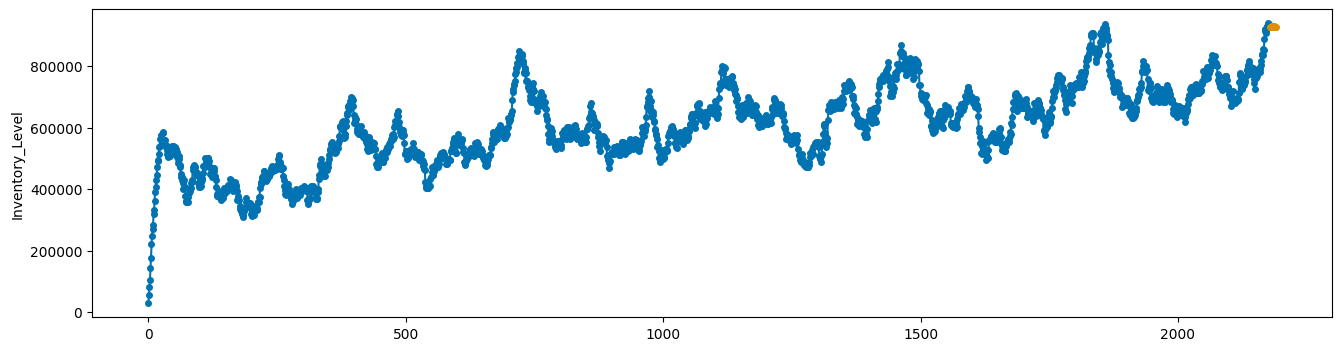

In [5]:
data = pd.read_csv("train_inventory(in).csv", parse_dates=["Date"])
monthly_sum = data.groupby(data["Date"].dt.to_period("M"))["Inventory_Level"].sum()
monthly_sum = monthly_sum.to_timestamp()
ts = data['Inventory_Level']
print(ts)
y_train, y_test = temporal_train_test_split(ts, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)


plot_series(y_train, y_pred)


0     18178906
1     21702416
2     23457615
3     27006627
4     22406545
5     21004326
6     22151145
7     21820733
8     20390116
9     21427669
10    23759888
11    22916972
12    22137101
13    23351432
14    28076257
Name: Inventory_Sum, dtype: int64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Sum'>)

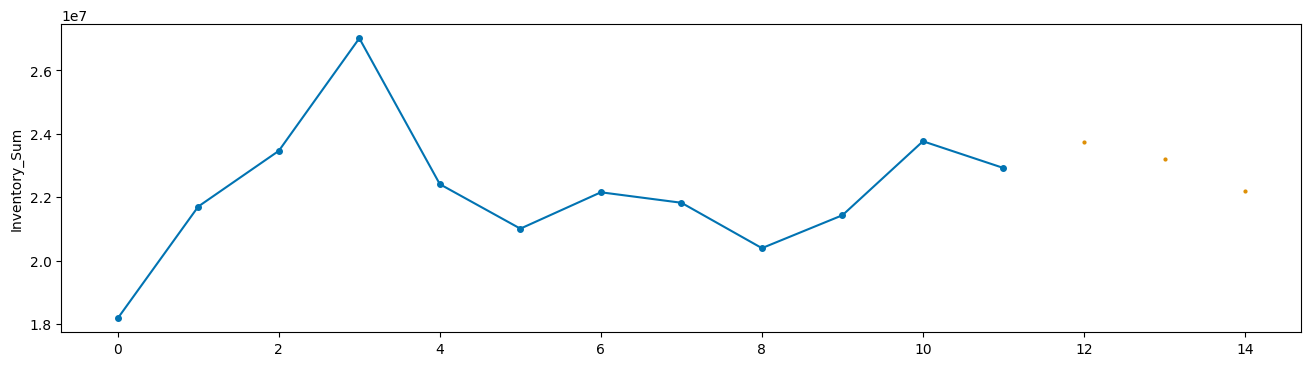

In [33]:
data = pd.read_csv("train_inventory(in).csv", parse_dates=["Date"])
today = pd.Timestamp.today()
last_year_df = data[data["Date"] >= (today - pd.DateOffset(years=4))]

monthly_sum = last_year_df.groupby(last_year_df["Date"].dt.to_period("M"))["Inventory_Level"].sum()
monthly_sum = monthly_sum.to_timestamp()

monthly_sum_df = monthly_sum.reset_index()
monthly_sum_df.columns = ["Month", "Inventory_Sum"]

ts = monthly_sum_df['Inventory_Sum']
print(ts)
y_train, y_test = temporal_train_test_split(ts, test_size=3)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=3)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
plot_series(y_train, y_pred)

0.0995052651174347


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Sum'>)

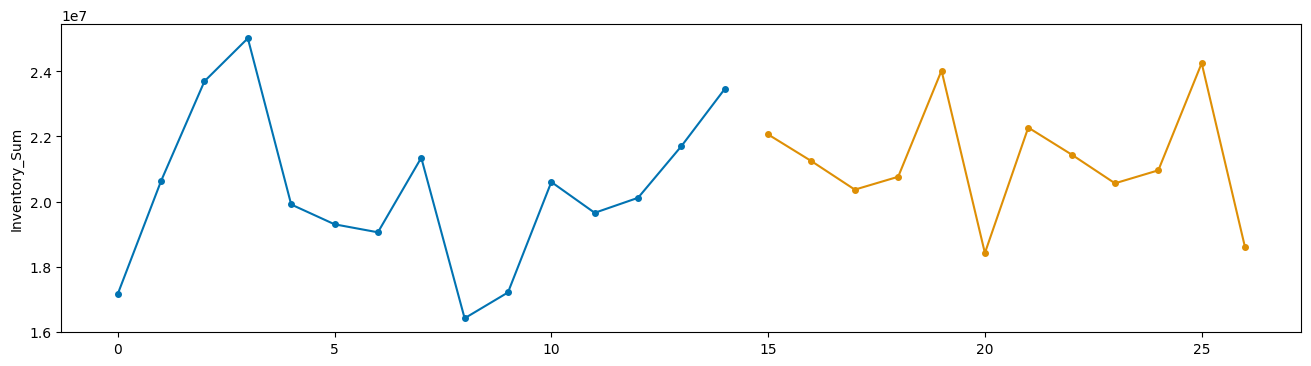

In [35]:
data = pd.read_csv("train_inventory(in).csv", parse_dates=["Date"])
today = pd.Timestamp.today()
last_year_df = data[data["Date"] >= (today - pd.DateOffset(years=5))]

monthly_sum = last_year_df.groupby(last_year_df["Date"].dt.to_period("M"))["Inventory_Level"].sum()
monthly_sum = monthly_sum.to_timestamp()

monthly_sum_df = monthly_sum.reset_index()
monthly_sum_df.columns = ["Month", "Inventory_Sum"]

ts = monthly_sum_df['Inventory_Sum']
# print(ts)
y_train, y_test = temporal_train_test_split(ts, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=6)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
plot_series(y_train, y_pred)

0.14055602488835772


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Inventory_Level'>)

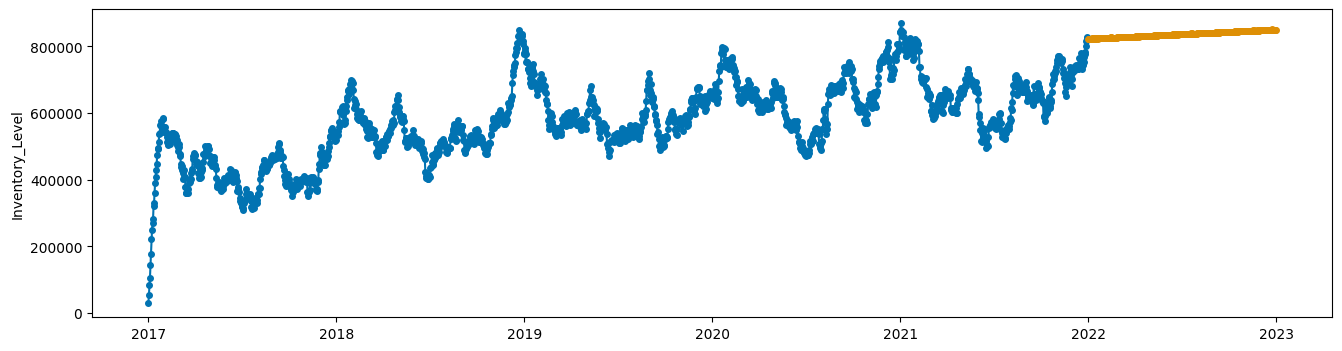

In [36]:

data = pd.read_csv("train_inventory(in).csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index = pd.DatetimeIndex(data.index).to_period('D')
ts = data['Inventory_Level']

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(ts, test_size=365)

# Define the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Initialize and fit the Theta forecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

# Generate predictions
y_pred = forecaster.predict(fh)

# Calculate and return the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

plot_series(y_train, y_pred)